## Import the packages

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Importing the Data

In [2]:
raw_csv_data = pd.read_csv('./Index2018.csv')

In [3]:
df_comp = raw_csv_data.copy()

## Examining the Data

In [4]:
df_comp.head()

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


In [5]:
df_comp.describe()

,spx,dax,ftse,nikkei
count,6269.000000,6269.000000,6269.000000,6269.000000
mean,1288.127542,6080.063363,5422.713545,14597.055700
std,487.586473,2754.361032,1145.572428,4043.122953
min,438.920000,1911.700000,2876.600000,7054.980000
25%,990.671905,4069.350000,4486.100000,10709.290000
50%,1233.420000,5773.340000,5662.430000,15028.170000
75%,1459.987747,7443.070000,6304.250000,17860.470000
max,2872.867839,13559.600000,7778.637689,24124.150000


In [7]:
df_comp.isna().sum()

date      0
spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

## Ploting the data

Text(0.5, 1.0, 'S&P v FTSE')

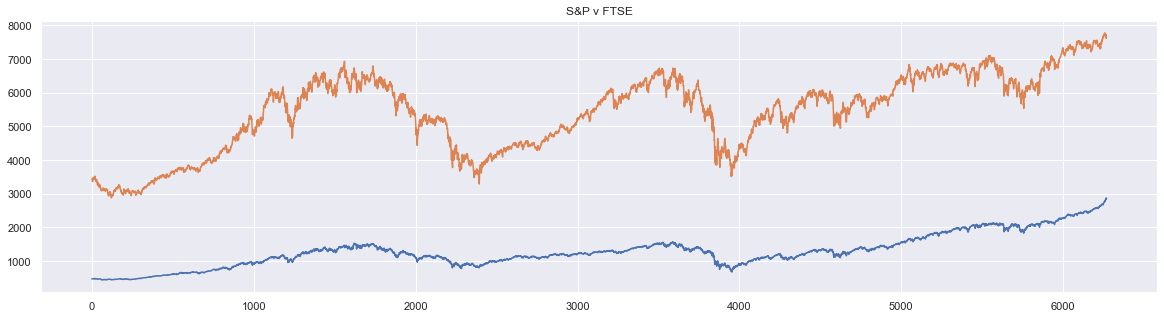

In [14]:
df_comp.spx.plot(figsize = (20,5),title = 'S&P500 Prices')
df_comp.ftse.plot(figsize = (20,5),title = 'FTSE100 Prices')
plt.title('S&P v FTSE')

## The QQ Plot

In [15]:
import scipy.stats
import pylab

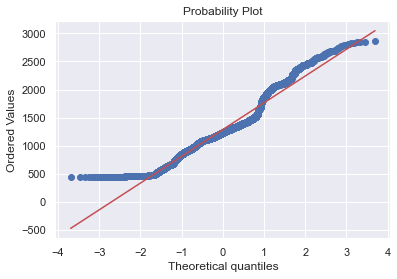

In [17]:
scipy.stats.probplot(df_comp.spx, plot = pylab)
pylab.show()

## Length of the Time Period

In [19]:
df_comp.date.describe()

count           6269
unique          6269
top       07/01/1994
freq               1
Name: date, dtype: object

In [20]:
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True )

In [21]:
df_comp.head()

,date,spx,dax,ftse,nikkei
0,1994-01-07,469.90,2224.95,3445.98,18124.01
1,1994-01-10,475.27,2225.00,3440.58,18443.44
2,1994-01-11,474.13,2228.10,3413.77,18485.25
3,1994-01-12,474.17,2182.06,3372.02,18793.88
4,1994-01-13,472.47,2142.37,3360.01,18577.26


In [22]:
df_comp.date.describe()

C:\Users\esmae\AppData\Local\Temp/ipykernel_1556/49469409.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_comp.date.describe()


count                    6269
unique                   6269
top       1994-01-07 00:00:00
freq                        1
first     1994-01-07 00:00:00
last      2018-01-29 00:00:00
Name: date, dtype: object

## Setting the Index

In [23]:
df_comp.set_index("date", inplace = True)

In [24]:
df_comp.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


In [25]:
df_comp.describe()

,spx,dax,ftse,nikkei
count,6269.000000,6269.000000,6269.000000,6269.000000
mean,1288.127542,6080.063363,5422.713545,14597.055700
std,487.586473,2754.361032,1145.572428,4043.122953
min,438.920000,1911.700000,2876.600000,7054.980000
25%,990.671905,4069.350000,4486.100000,10709.290000
50%,1233.420000,5773.340000,5662.430000,15028.170000
75%,1459.987747,7443.070000,6304.250000,17860.470000
max,2872.867839,13559.600000,7778.637689,24124.150000


## Setting the desired frequency

In [28]:
df_comp = df_comp.asfreq('b')

In [29]:
df_comp.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


## Handling missing values

In [30]:
df_comp.isna()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,False,False,False,False
1994-01-10,False,False,False,False
1994-01-11,False,False,False,False
1994-01-12,False,False,False,False
1994-01-13,False,False,False,False
...,...,...,...,...
2018-01-23,False,False,False,False
2018-01-24,False,False,False,False
2018-01-25,False,False,False,False


In [31]:
df_comp.isna().sum()

spx       8
dax       8
ftse      8
nikkei    8
dtype: int64

In [32]:
df_comp.spx = df_comp.spx.fillna(method = 'ffill') 

In [33]:
df_comp.isna().sum()

spx       0
dax       8
ftse      8
nikkei    8
dtype: int64

In [34]:
df_comp.ftse = df_comp.ftse.fillna(method = 'bfill') 

In [35]:
df_comp.isna().sum()

spx       0
dax       8
ftse      0
nikkei    8
dtype: int64

In [36]:
df_comp.dax = df_comp.dax.fillna(value = df_comp.dax.mean())

In [37]:
df_comp.isna().sum()

spx       0
dax       0
ftse      0
nikkei    8
dtype: int64

In [38]:
df_comp.nikkei = df_comp.nikkei.fillna(value = df_comp.nikkei.mean())

In [39]:
df_comp.isna().sum()

spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

## Simplifying the dataset

In [40]:
df_comp['market_value'] = df_comp.spx

In [41]:
df_comp.describe()

,spx,dax,ftse,nikkei,market_value
count,6277.000000,6277.000000,6277.000000,6277.000000,6277.000000
mean,1288.642547,6080.063363,5423.690398,14597.055700,1288.642547
std,487.868210,2752.604984,1145.568370,4040.545253,487.868210
min,438.920000,1911.700000,2876.600000,7054.980000,438.920000
25%,992.715221,4070.460000,4487.880000,10711.090000,992.715221
50%,1233.761241,5774.380000,5663.300000,15014.040000,1233.761241
75%,1460.250000,7442.660000,6304.630175,17858.420000,1460.250000
max,2872.867839,13559.600000,7778.637689,24124.150000,2872.867839


In [42]:
del df_comp['spx']

In [43]:
df_comp.describe()

,dax,ftse,nikkei,market_value
count,6277.000000,6277.000000,6277.000000,6277.000000
mean,6080.063363,5423.690398,14597.055700,1288.642547
std,2752.604984,1145.568370,4040.545253,487.868210
min,1911.700000,2876.600000,7054.980000,438.920000
25%,4070.460000,4487.880000,10711.090000,992.715221
50%,5774.380000,5663.300000,15014.040000,1233.761241
75%,7442.660000,6304.630175,17858.420000,1460.250000
max,13559.600000,7778.637689,24124.150000,2872.867839


In [45]:
del df_comp['ftse'] ,df_comp['nikkei']

In [46]:
df_comp.describe()

,dax,market_value
count,6277.000000,6277.000000
mean,6080.063363,1288.642547
std,2752.604984,487.868210
min,1911.700000,438.920000
25%,4070.460000,992.715221
50%,5774.380000,1233.761241
75%,7442.660000,1460.250000
max,13559.600000,2872.867839


In [47]:
del df_comp['dax']

In [48]:
df_comp.describe()

,market_value
count,6277.000000
mean,1288.642547
std,487.868210
min,438.920000
25%,992.715221
50%,1233.761241
75%,1460.250000
max,2872.867839


## Splitting the Data

In [49]:
size = int(len(df_comp)*0.8)

In [50]:
df = df_comp.iloc[:size]

In [51]:
df_test = df_comp[size:]

In [52]:
df.tail()

,market_value
date,
2013-04-01,1562.173837
2013-04-02,1570.252238
2013-04-03,1553.686978
2013-04-04,1559.979316
2013-04-05,1553.278930


In [53]:
df_test.head()

,market_value
date,
2013-04-08,1563.071269
2013-04-09,1568.607909
2013-04-10,1587.731827
2013-04-11,1593.369863
2013-04-12,1588.854623
